### 2022年度計算機演習A・B

# 第14回レポート課題の解説

### 演習1

正三角形から得られるコッホ曲線を**コッホ雪片（Koch snowflake）**と呼びます。

上記のコードを利用して、コッホ雪片を描画してください。ただし、繰り返し回数は5回とします。

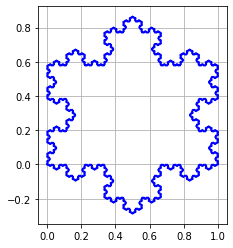

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def draw_segments(nodes):
    plt.plot(nodes[0,:],nodes[1,:],"b")
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

def add_nodes(two_nodes):
    p0 = two_nodes[:,0]
    p1 = two_nodes[:,1]
    p2 = 2/3*p0+1/3*p1
    p3 = 1/3*p0+2/3*p1
    theta = 60/180*np.pi
    A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    p4 = p2+A@(p3-p2)
    return np.array([p0,p2,p4,p3,p1]).T

def update_nodes(nodes):
    new_nodes = [nodes[:,0]]
    for i in range(nodes.shape[1]-1):
        two_nodes = nodes[:,[i,i+1]]
        tmp_nodes = add_nodes(two_nodes)
        for j in range(1,5):
            new_nodes.append(tmp_nodes[:,j])
    return np.array(new_nodes).T

nodes = np.array([[0,0],[1/2,3**(1/2)/2],[1,0],[0,0]]).T  #正三角形（時計回りかつ始点を終点にする）
n = 5  #繰り返し回数
for k in range(n):
    nodes = update_nodes(nodes)
draw_segments(nodes)

### 演習2

コッホ曲線を得るための操作における分割点の位置や角度を変えることによって、自分なりの新しいフラクタルを作成して描画してください。

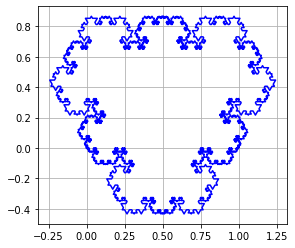

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def draw_segments(nodes):
    plt.plot(nodes[0,:],nodes[1,:],"b")
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

def add_nodes(two_nodes):
    p0 = two_nodes[:,0]
    p1 = two_nodes[:,1]
    p2 = 3/4*p0+1/4*p1  #分割点の位置を変えてみる
    p3 = 1/4*p0+3/4*p1
    theta = 60/180*np.pi
    A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    p4 = p2+A@(p3-p2)
    return np.array([p0,p2,p4,p3,p1]).T

def update_nodes(nodes):
    new_nodes = [nodes[:,0]]
    for i in range(nodes.shape[1]-1):
        two_nodes = nodes[:,[i,i+1]]
        tmp_nodes = add_nodes(two_nodes)
        for j in range(1,5):
            new_nodes.append(tmp_nodes[:,j])
    return np.array(new_nodes).T

nodes = np.array([[0,0],[1/2,3**(1/2)/2],[1,0],[0,0]]).T  #正三角形
n = 5  #繰り返し回数
for k in range(n):
    nodes = update_nodes(nodes)
draw_segments(nodes)

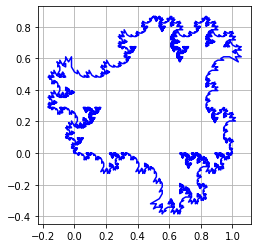

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_segments(nodes):
    plt.plot(nodes[0,:],nodes[1,:],"b")
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

def add_nodes(two_nodes):
    p0 = two_nodes[:,0]
    p1 = two_nodes[:,1]
    p2 = 2/3*p0+1/3*p1
    p3 = 1/3*p0+2/3*p1
    theta = 120/180*np.pi  #角度を変えてみる
    A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    p4 = p2+A@(p3-p2)
    return np.array([p0,p2,p4,p3,p1]).T

def update_nodes(nodes):
    new_nodes = [nodes[:,0]]
    for i in range(nodes.shape[1]-1):
        two_nodes = nodes[:,[i,i+1]]
        tmp_nodes = add_nodes(two_nodes)
        for j in range(1,5):
            new_nodes.append(tmp_nodes[:,j])
    return np.array(new_nodes).T

nodes = np.array([[0,0],[1/2,3**(1/2)/2],[1,0],[0,0]]).T  #正三角形
n = 5  #繰り返し回数
for k in range(n):
    nodes = update_nodes(nodes)
draw_segments(nodes)

### 演習3（オプション）

正方形から得られるミンコフスキーのソーセージを描画してください。ただし、繰り返し回数は5回とします。

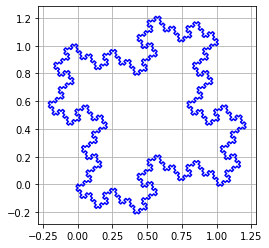

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def draw_segments(nodes):
    plt.plot(nodes[0,:],nodes[1,:],"b")
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

def add_nodes(two_nodes):  #ミンコフスキーのソーセージの作成方法に従って、この関数だけ修正すればよい
    p0 = two_nodes[:,0]
    p1 = two_nodes[:,1]
    q = p0+1/(5**(1/2))*(p1-p0)  #qの計算
    r = p1+1/(5**(1/2))*(p0-p1)  #rの計算
    theta = -np.arcsin(1/(5**(1/2)))  #時計回りの回転なのでマイナスを付ける
    A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    p2 = p0+A@(q-p0)  #p2の計算
    p3 = p1+A@(r-p1)  #p3の計算
    return np.array([p0,p2,p3,p1]).T

def update_nodes(nodes):
    new_nodes = [nodes[:,0]]
    for i in range(nodes.shape[1]-1):
        two_nodes = nodes[:,[i,i+1]]
        tmp_nodes = add_nodes(two_nodes)
        for j in range(1,4):
            new_nodes.append(tmp_nodes[:,j])
    return np.array(new_nodes).T

nodes = np.array([[0,0],[0,1],[1,1],[1,0],[0,0]]).T  #正方形（時計回りでも反時計回りでも同じ結果になる）
n = 5  #繰り返し回数
for k in range(n):
    nodes = update_nodes(nodes)
draw_segments(nodes)